Данные взяты с сайта [rp5.ru/Архив\_погоды\_в\_Москве\_(ВДНХ)](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))

In [214]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

In [183]:
os.listdir()

['.ipynb_checkpoints', 'IPG2211A2N.xls', 'День 2.ipynb', 'Мск_5лет.xls']

In [184]:
data = pd.read_excel('Мск_5лет.xls', skiprows=6)

In [185]:
# Оставим только полдень

In [193]:
data.index = pd.DatetimeIndex(pd.to_datetime(data['Местное время в Москве (ВДНХ)'], format='%d.%m.%Y %H:%M'))

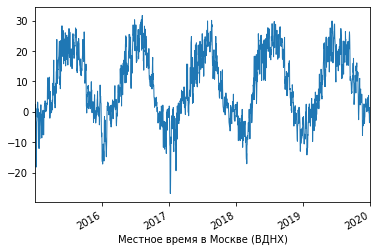

In [194]:
mask = (data.index.hour == 12)
data = data[mask]
data['T'].plot(linewidth=1)

In [195]:
data['T'].diff().quantile([0.01, 0.99])

0.01   -8.000
0.99    9.776
Name: T, dtype: float64

In [196]:
print('Максимальное значение равно', data['T'])

Максимальное значение равно Местное время в Москве (ВДНХ)
2020-01-01 12:00:00   -2.0
2019-12-31 12:00:00    1.4
2019-12-30 12:00:00   -3.4
2019-12-29 12:00:00   -3.6
2019-12-28 12:00:00   -0.7
                      ... 
2015-01-05 12:00:00   -8.5
2015-01-04 12:00:00    0.8
2015-01-03 12:00:00    2.4
2015-01-02 12:00:00    1.5
2015-01-01 12:00:00   -1.5
Name: T, Length: 1826, dtype: float64


In [197]:
data.index

DatetimeIndex(['2020-01-01 12:00:00', '2019-12-31 12:00:00',
               '2019-12-30 12:00:00', '2019-12-29 12:00:00',
               '2019-12-28 12:00:00', '2019-12-27 12:00:00',
               '2019-12-26 12:00:00', '2019-12-25 12:00:00',
               '2019-12-24 12:00:00', '2019-12-23 12:00:00',
               ...
               '2015-01-10 12:00:00', '2015-01-09 12:00:00',
               '2015-01-08 12:00:00', '2015-01-07 12:00:00',
               '2015-01-06 12:00:00', '2015-01-05 12:00:00',
               '2015-01-04 12:00:00', '2015-01-03 12:00:00',
               '2015-01-02 12:00:00', '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', name='Местное время в Москве (ВДНХ)', length=1826, freq=None)

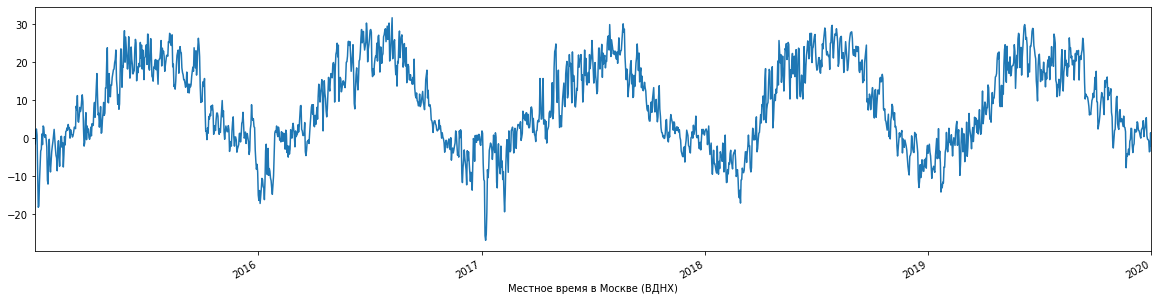

In [198]:
data['T'].plot(figsize=(20, 5))

Среднее
$$mean(x_1, x_2,..., x_n) = \frac{x_1+x_2+...+x_3}{n}$$


Среднеквадратичное отклонение
$$std(x_1,  ..., x_n) = \sqrt{\frac{(x_1-mean)^2 + ... + (x_n-mean)^2}{n}} = \frac{\sum_{i=1}^n (x_i-mean)^2}{n}$$

"95-й Квантиль случайной величины = 0.28" читается как "с 95%-й вероятность значение не превысит 0.28"

In [ ]:
Корреляция
$$corr([x1, ..., x_n], [y_1, ..., y_n]) = \frac{}{}$$

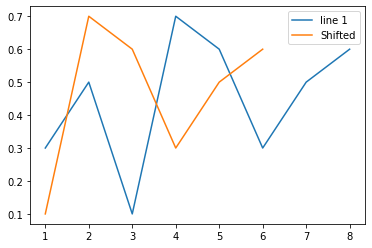

In [88]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], [0.3, 0.5, 0.1, 0.7, 0.6, 0.3, 0.5, 0.6], label='line 1')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8],           [0.1, 0.7, 0.6, 0.3, 0.5, 0.6, None, None], label='Shifted')
plt.legend()

In [25]:
np.corrcoef([0.3, 0.5, 0.1], [0.5, 0.1, 0.7])

array([[ 1.        , -0.98198051],
       [-0.98198051,  1.        ]])

In [ ]:
Автокорреляция: 

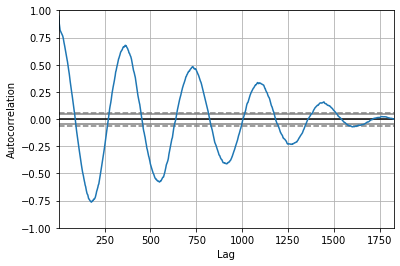

In [199]:
autocorrelation_plot(data['T'])

In [200]:
data['T'].autocorr(lag=1)

0.946833963400879

In [201]:
# Поищем пропуски

In [37]:
mask = data['T'].isna()
data[mask]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Местное время в Москве (ВДНХ),,,,,,,,,,,,,,,,,,,,,


In [202]:
data.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
count,1826.000000,1826.000000,1826.000000,1815.000000,1825.000000,1826.000000,19.000000,86.000000,0.0,0.0,1820.000000,1825.000000,0.0,0.0
mean,8.772837,747.612103,762.026177,0.021543,65.252055,1.570646,10.421053,11.046512,NaN,NaN,8.523187,1.607507,NaN,NaN
std,10.986743,7.655981,7.868374,0.912714,20.220360,0.801159,0.606977,1.264046,NaN,NaN,2.664971,8.619287,NaN,NaN
min,-26.900000,718.200000,732.400000,-5.200000,14.000000,0.000000,10.000000,10.000000,NaN,NaN,0.200000,-30.500000,NaN,NaN
25%,0.400000,742.600000,756.900000,-0.500000,49.000000,1.000000,10.000000,10.000000,NaN,NaN,10.000000,-4.200000,NaN,NaN
50%,8.050000,747.500000,761.800000,0.000000,68.000000,1.000000,10.000000,11.000000,NaN,NaN,10.000000,1.100000,NaN,NaN
75%,18.500000,752.500000,766.900000,0.500000,83.000000,2.000000,11.000000,12.000000,NaN,NaN,10.000000,8.700000,NaN,NaN
max,31.700000,774.100000,789.100000,4.900000,100.000000,5.000000,12.000000,14.000000,NaN,NaN,10.000000,19.900000,NaN,NaN


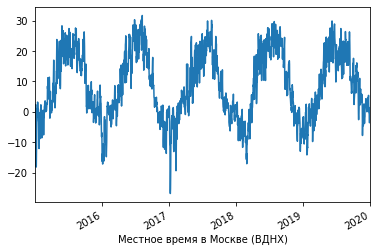

In [203]:
data['T'].plot()

In [206]:
decompose = seasonal_decompose(data['T'], freq=365)
decompose.plot()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [127]:
list(range(5))

[0, 1, 2, 3, 4]

In [132]:
regr = LinearRegression()
regr.fit(pd.DataFrame(range(len(data))), data['T'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
data.reset_index(drop=True)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2019 12:00,1.4,731.2,745.7,-0.6,92.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,30.12.2019 12:00,-3.4,748.6,763.7,-3.3,84.0,"Ветер, дующий с юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-5.8,NaN,NaN,NaN,NaN,NaN,NaN
3,29.12.2019 12:00,-3.6,759.3,774.6,0.5,88.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN
4,28.12.2019 12:00,-0.7,751.6,766.6,1.5,91.0,"Ветер, дующий с северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN
1822,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN
1823,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN
1824,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
regr.predict(pd.DataFrame(range(len(data))))

array([9.61582254, 9.61489872, 9.6139749 , ..., 7.93169871, 7.93077489,
       7.92985107])

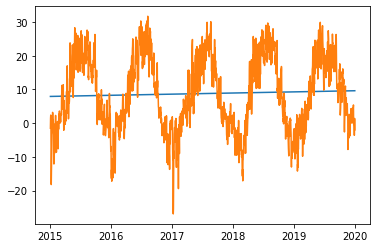

In [134]:
plt.plot(data.index, regr.predict(pd.DataFrame(range(len(data)))))
plt.plot(data['T'])

In [139]:
os.listdir()

['.ipynb_checkpoints', 'IPG2211A2N.xls', 'День 2.ipynb', 'Мск_5лет.xls']

In [218]:
data = pd.read_excel('IPG2211A2N.xls', skiprows=10)

In [221]:
x = data.index
x

RangeIndex(start=0, stop=972, step=1)

In [222]:
data.index = pd.DatetimeIndex(data['observation_date'])
data.index = pd.to_datetime(data['observation_date'])

In [223]:
data

,observation_date,IPG2211A2N
observation_date,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133
...,...,...
2019-08-01,2019-08-01,111.2697
2019-09-01,2019-09-01,102.0033
2019-10-01,2019-10-01,93.9993


In [224]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='observation_date', length=972, freq=None)

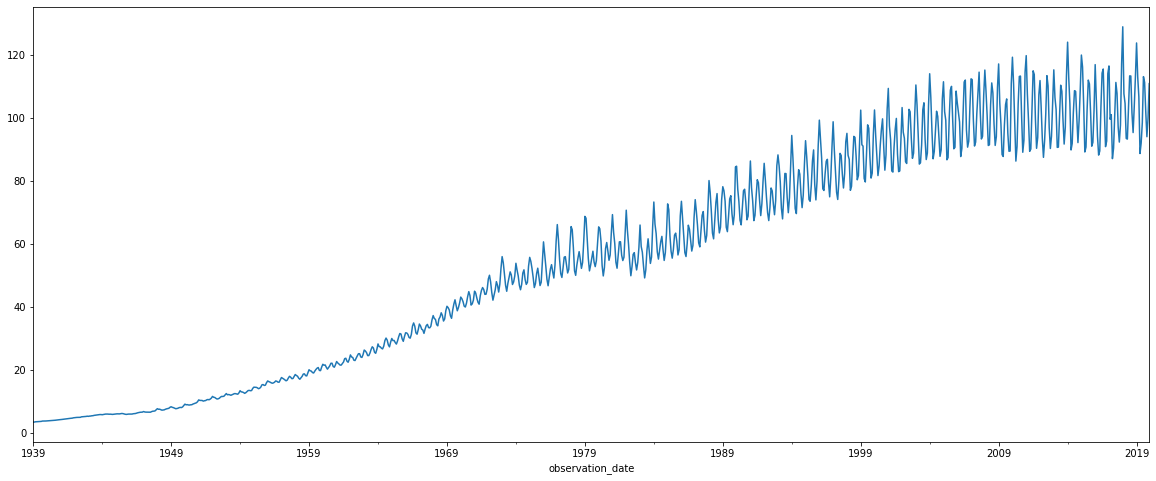

In [225]:
data['IPG2211A2N'].plot(figsize=(20,8))

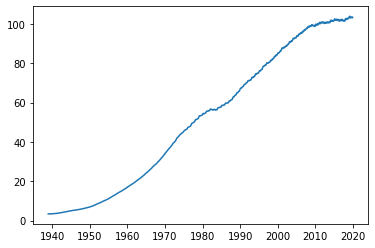

In [234]:
plt.plot(data['IPG2211A2N'].ewm(span=70, adjust=False).mean())

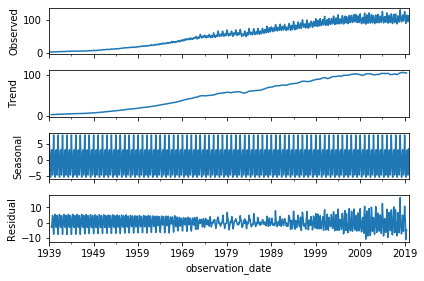

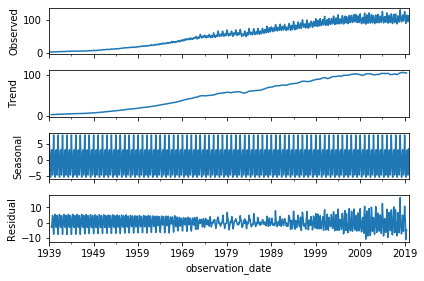

In [226]:
decompose = seasonal_decompose(data['IPG2211A2N'])
decompose.plot()

In [228]:
trend = LinearRegression()
trend.fit(pd.DataFrame(x), data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

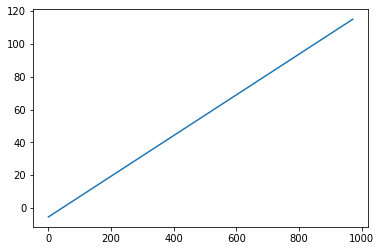

In [230]:
plt.plot(x, trend.predict(pd.DataFrame(x)))

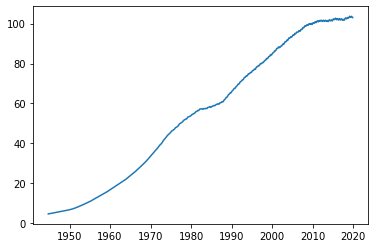

In [239]:
plt.plot(data['IPG2211A2N'].rolling(window=70).mean())

In [243]:
regressor = DecisionTreeRegressor()

In [247]:
data.shape

(972, 2)

In [249]:
regressor.fit(pd.DataFrame(x)[:800], data['IPG2211A2N'][:800])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

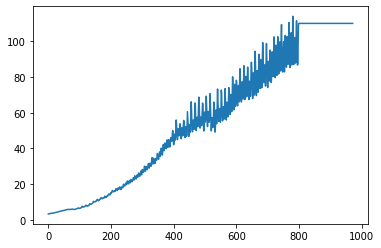

In [250]:
plt.plot(regressor.predict(pd.DataFrame(x)))